<a href="https://colab.research.google.com/github/AdnanSakal/k_means/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
a = tf.range(100).numpy().reshape([50,2])
a[:10]

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19]], dtype=int32)

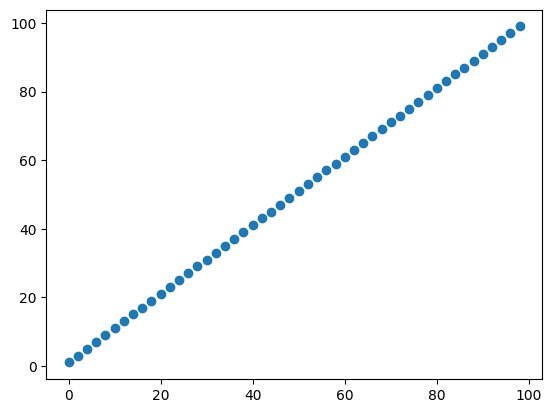

In [ ]:
plt.scatter(a[:,0],a[:,1])

In [ ]:
import random
demo_centroids = random.sample(list(a),3)
demo_centroids

[array([40, 41], dtype=int32),
 array([90, 91], dtype=int32),
 array([0, 1], dtype=int32)]

In [ ]:
def find_closet(x,centroids):
  idx = np.zeros(x.shape[0])
  for i in range(x.shape[0]):
    distance = []
    for j in range(len(centroids)):
      norm_ij = np.linalg.norm(x[i]-centroids[j])
      distance.append(norm_ij)
    idx[i] = np.argmin(distance)
  return idx

In [ ]:
demo_idx = find_closet(a,demo_centroids)

In [ ]:
demo_idx

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
def compute_centroids(x,idx,K):
  centroids = np.zeros([len(K),x.shape[1]])
  for k in range(len(K)):
    point = x[idx == k]
    centroids[k] = np.mean(point,axis=0)
  return centroids

In [ ]:
new_demo_centroids = compute_centroids(a,demo_idx,demo_centroids)
new_demo_centroids

array([[42., 43.],
       [82., 83.],
       [ 9., 10.]])

In [ ]:
def run_kmeans(x,initialize_centroids,max_iter=20):
  centroids = initialize_centroids
  for i in range(max_iter):
    idx = find_closet(x,centroids)
    centroids = compute_centroids(x,idx,centroids)
  return centroids,idx

In [ ]:
centroids = random.sample(list(a),3)

In [ ]:
org_centroids,org_idx = run_kmeans(a,centroids)

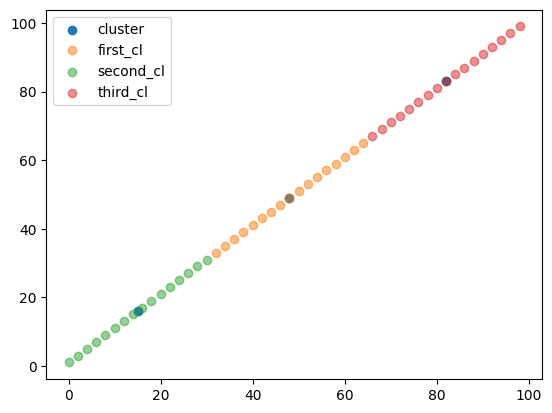

In [ ]:
plt.scatter(org_centroids[:,0],org_centroids[:,1],label = "cluster")

first_cl_data = a[org_idx == 0]
second_cl_data = a[org_idx == 1]
third_cl_data = a[org_idx == 2]

plt.scatter(first_cl_data[:,0],first_cl_data[:,1],label = "first_cl",alpha = 0.5)
plt.scatter(second_cl_data[:,0],second_cl_data[:,1],label = "second_cl",alpha = 0.5)
plt.scatter(third_cl_data[:,0],third_cl_data[:,1],label = "third_cl",alpha = 0.5)

plt.legend()

In [ ]:
org_centroids

array([[48., 49.],
       [15., 16.],
       [82., 83.]])